In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import json
import os
import pandas as pd
from tqdm import tqdm
dir1 = '../data/input/requests'  #TODO: clean this up;:
dir2 = '../data/input/responses'


import sys
sys.path.append('../utils')
import helpers as h

In [2]:
def extract_data(basedir):
    texts = []
    for dir in os.listdir(basedir):
        full_path = os.path.join(basedir, dir)
        for file in os.listdir(full_path):
            full_path2 = os.path.join(full_path, file)
            with open(full_path2, 'r', encoding='utf8') as f: 
                size = os.path.getsize(full_path2)
                text = f.read()
                text = text.strip()
                if '{' not in text:
                    valid = False
                else:
                    valid = True
                row = [size, valid, full_path2, text]
                texts.append(row)

    df_requests = pd.DataFrame(texts, columns=['size', 'valid', 'path',  'text'])
    return df_requests

In [3]:
requests = extract_data(dir1)
requests.query('valid == True')

,size,valid,path,text
7,37265,True,../data/input/requests\0521_301-20220530\0521_...,"{""id"": ""cb9638db-2817-4ccf-b226-7775c01793a8"",..."
58,28013,True,../data/input/requests\0521_301-20220609\0521_...,"{""id"": ""f7990ec4-3d9c-4a2c-a3e4-d553a64ebf70"",..."
92,19879,True,../data/input/requests\0521_301-20220617\0521_...,"{""id"": ""068d58f5-6d45-49af-b842-e00ea6d5185c"",..."
101,27229,True,../data/input/requests\0521_301-20220617\0521_...,"{""id"": ""4b026fff-8ba8-4997-acba-0ea051d0efa3"",..."
114,25413,True,../data/input/requests\0521_301-20220621\0521_...,"{""id"": ""d1140223-a87f-4ac3-8d2e-e256eeb9d0a1"",..."
127,18827,True,../data/input/requests\0521_302-20220530\0521_...,"{""id"": ""30a22552-c06a-48e3-ba52-cfc4c3c4c3f7"",..."
686,45386,True,../data/input/requests\0521_310-20220530\0521_...,"{""id"": ""45bdf18f-0504-4c29-b88e-117177107f04"",..."
847,31023,True,../data/input/requests\0521_313-20220530\0521_...,"{""id"": ""80486d30-49dc-4a93-8c27-57a90a1ad4d7"",..."
959,33239,True,../data/input/requests\0521_314-20220530\0521_...,"{""id"": ""238e62b8-68f2-49d2-bfc4-7ca4219a9d7c"",..."


In [4]:
responses = extract_data(dir2)
responses.query('valid == True')

,size,valid,path,text


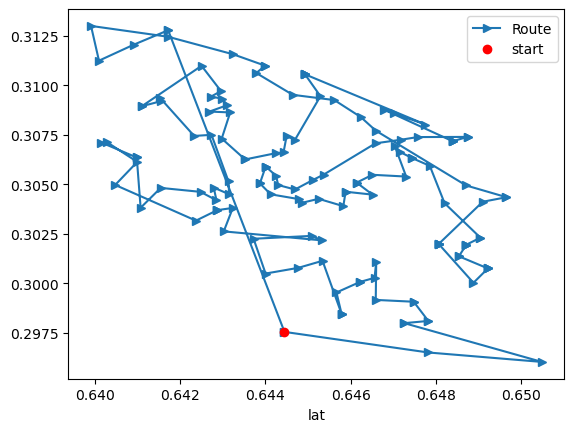

In [6]:
route_id = '0521_301'
ymd = '20220621'
idx_file = 0
data = h.get_route_dataframe(route_id, ymd, idx_file)
fig, ax = h.visualize_request(route_id, ymd, idx_file)

In [7]:


lat_center, lon_center = h.get_route_center(route_id, ymd, idx_file)



In [20]:
for dir in tqdm(os.listdir('../data/input/requests')):
    if '_' in dir: 
        dir = dir.split('-')
        route_id = dir[0].strip()
        ymd = dir[1].strip()
        print(route_id, ymd)
        idx_file = 0
        data = h.get_route_dataframe(route_id, ymd, idx_file)
all_points = ''
cluster_df, centers = h.find_clusters(data)

  0%|          | 0/3726 [00:00<?, ?it/s]

0521_300 20220617


JSONDecodeError: Expecting value: line 1 column 1 (char 0)